In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import statistics
#Mounts to google drive in order to use the given dataset
from google.colab import drive
drive.mount('/content/drive')

#Analysis of AEP (American Electric Power)'s dataset for the HackOHIO challenge. 
#Each row of the dataframe represents a 10-minute average, all the way up to a full year's performance of ten different windmills.
#This notebook primarily analyzes the windmill's operating times, power output, battery cabinet temperature, and state/faults

Mounted at /content/drive


In [3]:
# Rename all files to replace space with -
path = "drive/MyDrive/Shtuff"
for filename in os.listdir(path):
    #print(filename)
    os.rename(os.path.join(path,filename),os.path.join(path, filename.replace(' ', '_').lower())) 

In [4]:
#Processes Pandas dataframes from csv files
dfA = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-a.csv")
dfB = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-b.csv")
dfC = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-c.csv")
dfD = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-d.csv")
dfE = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-e.csv")
dfF = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-f.csv")
dfG = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-g.csv")
dfH = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-h.csv")
dfI = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-i.csv")
dfJ = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-j.csv")
dfDPC = pd.read_csv("drive/MyDrive/Shtuff/osu_hack_ohio_fall_2022_data_final-dpc.csv")

dfList = [dfA, dfB, dfC, dfD, dfE, dfF, dfG, dfH, dfI, dfJ]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,95,96

Text(0, 0.5, 'Frequency')

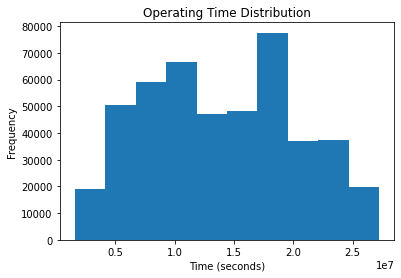

In [8]:
# Histogram shows the distribution of operating times for the windmills

col = []
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
for d, dataframe in enumerate(dfList):
  for datapoint in dataframe.loc[1:,f"WTG-{letters[d]} (2.82-FDR 2A) - (GRID) OPERATING TIME"]:
    if not datapoint == "Bad":
      col.append(int(datapoint))
plt.hist(col)
plt.title('Operating Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')


In [ ]:
#Listing all columns from windmill A to give a better idea of what the dataframe contains
list(dfA.columns)

['Turbine',
 'Date & Time',
 'WTG-A (2.82-FDR 2A) - (GRID) OPERATING TIME',
 'WTG-A (2.82-FDR 2A) - (GRID) OPERATING TIME UP TO LAST MONTH',
 'Average Air Density 82m',
 'WTG-A (2.82-FDR 2A) - AUX SENSOR MEAS FOR CONFIGSTOP',
 'WTG-A (2.82-FDR 2A) - AUXILIARY TRANSFORMER TEMPERATURE',
 'WTG-A (2.82-FDR 2A) - AXIS 3 BATTERY CABINET TEMPERATURE',
 'WTG-A (2.82-FDR 2A) - AXIS 1 CONTROL CABINET TEMPERATURE',
 'WTG-A (2.82-FDR 2A) - AXIS 2 CONTROL CABINET TEMPERATURE',
 'WTG-A (2.82-FDR 2A) - AXIS 3 CONTROL CABINET TEMPERATURE',
 'WTG-A (2.82-FDR 2A) - BLADE 1 - ACTUAL VALUE',
 'WTG-A (2.82-FDR 2A) - BLADE 1 - SET VALUE',
 'WTG-A (2.82-FDR 2A) - BLADE 2 - ACTUAL VALUE',
 'WTG-A (2.82-FDR 2A) - BLADE 2 - SET VALUE',
 'WTG-A (2.82-FDR 2A) - BLADE 3 - ACTUAL VALUE',
 'WTG-A (2.82-FDR 2A) - BLADE 3 - SET VALUE',
 'WTG-A (2.82-FDR 2A) - CIRCUIT BREAKER CUT-INS',
 'WTG-A (2.82-FDR 2A) - CONSUMPTION',
 'WTG-A (2.82-FDR 2A) - CONSUMPTION UP TO LAST MONTH',
 'WTG-A (2.82-FDR 2A) - CONVERTER TORQUE R

In [ ]:
print("Information about 'WTG-[letter] (2.82-FDR 2A) - AXIS 3 BATTERY CABINET TEMPERATURE'")
col = []

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
for d, dataframe in enumerate(dfList):
  for datapoint in dataframe.loc[1:,f"WTG-{letters[d]} (2.82-FDR 2A) - AXIS 3 BATTERY CABINET TEMPERATURE"]:
    if not datapoint == "Bad":
      col.append(float(datapoint))

  print("Median of Dataset " + letters[d] + " is " + str(statistics.median(col)))
  sum = 0
  for i in col:
    sum += i
  sum /= len(col)
  print("Average of Dataset " + letters[d] + " is " + str(sum))

Information about 'WTG-[letter] (2.82-FDR 2A) - AXIS 3 BATTERY CABINET TEMPERATURE'
Median of Dataset A is 24.10783958
Average of Dataset A is 23.63466432138193
Median of Dataset B is 24.04304314
Average of Dataset B is 23.393310927816287
Median of Dataset C is 25.02653313
Average of Dataset C is 24.17456790875567
Median of Dataset D is 26.05640411
Average of Dataset D is 25.21437208952549
Median of Dataset E is 26.03787613
Average of Dataset E is 25.150795264146282
Median of Dataset F is 26.015830995
Average of Dataset F is 25.02404248215661
Median of Dataset G is 26.06593132
Average of Dataset G is 25.30978970357479
Median of Dataset H is 26.043152810000002
Average of Dataset H is 25.21485474507094
Median of Dataset I is 26.05641937
Average of Dataset I is 25.27344852634021
Median of Dataset J is 26.0525465
Average of Dataset J is 25.253612918485228


In [ ]:
from pandas.core.resample import DateOffset

#Generates the median of each windmill's power divided by expected power
#Gives a good idea of which windmills are underperforming
x = dfA.loc[dfA["WTG-A (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-A (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfA.loc[(dfA["WTG-A (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfA["WTG-A (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-A (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine A: " + str(z.median()))

x = dfB.loc[dfB["WTG-B (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-B (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfB.loc[(dfB["WTG-B (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfB["WTG-B (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-B (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine B: " + str(z.median()))


x = dfC.loc[dfC["WTG-C (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-C (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfC.loc[(dfC["WTG-C (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfC["WTG-C (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-C (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine C: " + str(z.median()))


x = dfD.loc[dfD["WTG-D (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-D (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfD.loc[(dfD["WTG-D (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfD["WTG-D (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-D (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 

z = x/y
print("Median of turbine D: " + str(z.median()))

x = dfE.loc[dfE["WTG-E (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-E (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfE.loc[(dfE["WTG-E (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfE["WTG-E (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-E (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine E: " + str(z.median()))


x = dfF.loc[dfF["WTG-F (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-F (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfF.loc[(dfF["WTG-F (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfF["WTG-F (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-F (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine F: " + str(z.median()))


x = dfE.loc[dfE["WTG-E (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-E (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfE.loc[(dfE["WTG-E (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfE["WTG-E (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-E (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine E: " + str(z.median()))


x = dfH.loc[dfH["WTG-H (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-H (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfH.loc[(dfH["WTG-H (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfH["WTG-H (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-H (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine H: " + str(z.median()))


x = dfI.loc[dfI["WTG-I (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-I (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfI.loc[(dfI["WTG-I (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfI["WTG-I (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-I (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine I: " + str(z.median()))


x = dfJ.loc[dfJ["WTG-J (2.82-FDR 2A) - POWER"] != "Bad"]
x = x[1:len(x)]
x = x["WTG-J (2.82-FDR 2A) - POWER"].astype("float")
 
 
y = dfJ.loc[(dfJ["WTG-J (2.82-FDR 2A) - EXPECTED POWER"] != "Bad") & (dfJ["WTG-J (2.82-FDR 2A) - EXPECTED POWER"] != "Calc Failed") ]
y = y[1:len(y)]
y = y["WTG-J (2.82-FDR 2A) - EXPECTED POWER"].astype("float")
 
 
z = x/y
print("Median of turbine J: " + str(z.median()))




Median of turbine A: 0.6371637156349736
Median of turbine B: 0.48884687293838125
Median of turbine C: 0.995783201022577
Median of turbine D: 0.8409899649070833
Median of turbine E: 0.9333774897446016
Median of turbine F: 0.9393756208440531
Median of turbine E: 0.9333774897446016
Median of turbine H: 0.6499552425189995
Median of turbine I: 0.9721031291898881
Median of turbine J: 0.9819673567653184


In [11]:
#Generates each windmill's respective state and fault counts
#Gives good idea of which windmill has an excessively high fault count
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
for d, dataframe in enumerate(dfList):
  print(f'Windmill {letters[d]}:\n')
  print(dataframe[f'WTG-{letters[d]} (2.82-FDR 2A) - STATE AND FAULT'].value_counts())

Windmill A:

OnLine                  27173
Repair                  13542
Bad                      5877
RunUp                    1333
External Curtailment     1098
Weather Outage            625
Fault 1102                598
Manual Idle               547
Fault 2505                456
OK                        424
Fault 4532                413
Fault 1019                214
Fault 1177                168
Fault 2289                 11
Maintenance                11
GridFault                  10
Fault 1340                 10
Fault 1436                  9
Fault 2202                  8
Fault 2255                  7
Fault 2277                  6
State 1000                  5
Fault 3990                  3
Fault 2209                  3
Fault 2601                  2
Fault 2602                  2
Fault 2526                  2
Fault 1139                  1
                            1
Fault 3996                  1
Fault 1955                  1
Manual Stop                 1
Name: WTG-A (2.82-FDR 2A) -